# Problem Sheet 3

## 1.  Glycolysis
Glycolysis is the process by which cells break down sugars to harvest their chemical energy.  The simplest model of glycolysis involves two chemical species, Adenosine Diphosphate (ADP) and phosphorylated fructose (F6P).  ADP plays an important role in the transport of energy in the cell, while F6P is the molecule to which the sugar is converted.  

In the model, we assume a constant inflow of F6P, denoted as $Y$, into the system at rate $\beta$ such that 

\begin{align*}
\varnothing \xrightarrow{\beta} Y
\end{align*}	

The F6P can be converted directly into ADP, denoted at $X$, at a rate $\alpha$.

\begin{align*}
Y \xrightarrow{\alpha} X
\end{align*}	

Additionally, F6P can combine with ADP such that

\begin{align*}
2X + Y \xrightarrow{\gamma} 3X
\end{align*}

Finally, we assume that ADP degrades at rate $\mu$

\begin{align*}
X \xrightarrow{\mu} \varnothing
\end{align*}


1. Apply the law of mass action to obtain the system of ODEs that describe the dynamics of concentrations $x = [X]$ and $y = [Y]$.

2. Introduce suitable nondimensional variables, $u$, $v$, and $\tau$ such that the system of equations becomes
\begin{align*}
\frac{du}{d\tau} = - u + a v + vu^2,\\  
\frac{dv}{d\tau} = b - av  - vu^2.
\end{align*}
Find the expressions for $a$ and $b$ in terms of the parameters in the original equations.

3. Find and sketch the nullclines.
4. Find the fixed point.
5. Show that following lines can be used to construct the outer boundary of a trapping set: 
(i) A vertical line connecting $(0,0)$ and $(0, b/a)$. (ii) A horizontal line connecting $(0, b/a)$ and $(b,b/a)$.
(iii) A diagonal line of slope $-1$ from the point $(b,b/a)$ to the point where it intersects the $u$-nullcline.  Call the point where they intesect $(u_0, v_0)$. (iv) A vertical line from $(u_0, v_0)$ to $(u_0, 0)$. (v)A horizontal line from $(u_0, 0)$ to $(0, 0)$. 

6. For what values of the parameters $a$ and $b$ does a close cycle exist in the trapping set? *Hint: Consider the stability of the fixed point.*



## 2. Period of limit cycles in predator-prey systems
In the notes, we used the Poincaré-Bendixson theorem to establish that the predator-prey model

\begin{align*}
\frac{du}{d\tau} = u(1 - u) - \frac{auv}{u + d}  \\
\frac{dv}{d\tau} = b v \left(1 - \frac{v}{u}\right), 
\end{align*}

has a limit cycle that surrounds the fixed point.


*Limit cycle I*: Confirm that the limit cycle emerges through a Hopf bifurcation where $b$ is the bifurcation parameter. Compute the period of the limit cycle just after the bifurcation has occured. You may leave your expression in terms of $u^*$.

*Limit cycle II*: Suppose that $b = \epsilon \ll 1$ such that the equations take the form

\begin{align*}
\frac{du}{d\tau} = f_1(u,v) \\
\frac{dv}{d\tau} = \epsilon f_2(u,v), 
\end{align*}

where $f_1 = u(1 - u) - auv/(u + d)$ and $f_2 = v(1 - v/u)$.  The code and figures below show that this system exhibits relaxation oscillator-like dynamics, though slightly different from those we saw with the Fitzhugh-Nagumo system.  


1. For part of the orbit, the trajectory lies essentially on the nullcline given by $f_1(u,v) = 0$. Explain why this is the case.  
2. When the trajectory reaches the local maximum, $(u_2, v_2)$, it leaves the nullcline and moves rapidly at a nearly constant value of $v$ toward the $v$-axis.  Explain why this has occured using arguments based on the a one-dimensional system where $du/dt = f_1(u;v)$ and $v$ being considered a parameter.  
3. Near the $v$-axis, the trajectory abruptly changes direction and moves downwards. Explain why this occurs when $u \approx \epsilon v_2^2$.  
4. Rescaling such that $u = \epsilon U$, show that in the limit $\epsilon \ll 1$,
\begin{align*}
\frac{dU}{d\tau} = U - \frac{avU}{d} \\
\frac{dv}{d\tau} = -\frac{v^2}{U}, 
\end{align*}
and conclude that this portion of the orbit also evolves at the fast timescale.

5. As a result, conclude that the approximate period of the orbit,
\begin{align*}
T =\frac{1}{a\epsilon}\int_{u_1}^{u_2}\frac{u(1 - d - 2u)}{v(u)(u - v(u))}du,
\end{align*}
where $v(u) = (1 - u)(u + d)/a$.

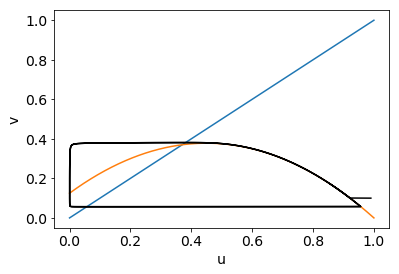

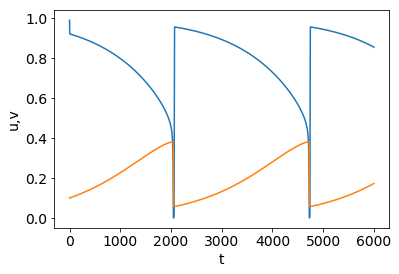

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint

a = 0.8
b = 0.001
d = 0.1

u = np.linspace(0,1,100000)
v1 = u
v2 = (1 - u)*(u + d)/a
plt.figure(0)
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("u")
plt.ylabel("v")
plt.plot(u,v1)
plt.plot(u,v2)

def du_dt(u, t):
    return [u[0]*(1 - u[0]) - a*u[0]*u[1]/(u[0] + d), b*u[1]*(1 - u[1]/u[0])]

u0 = [0.99, 0.1]
ts = np.linspace(0, 6000, 1000000)
us = odeint(du_dt, u0, ts)
pop1 = us[:,0]
pop2 = us[:,1]
plt.figure(0)
plt.plot(pop1,pop2,'k-')

plt.figure(1)
plt.plot(ts,pop1)
plt.plot(ts,pop2);
plt.xlabel("t");
plt.ylabel("u,v");


## 3. The Brusselator

The 'Brusselator' reaction mechanism,

\begin{align*}
A &\xrightarrow{k_1} X, \\
B + X &\xrightarrow{k_2} Y + D, \\
2X + Y &\xrightarrow{k_3} 3X, \\
X &\xrightarrow{k_4} E
\end{align*}

is a model for a class of autocatalytic reactions that exhibit oscillations.  

1. Assuming that the concentrations of $A$ and $B$ are kept constant, use the law of mass action to find they system of ODEs that governs the dynamics of the concentrations of $X$ and $Y$.
2. Nondimensionalise the system to obtain,

\begin{align*}
\frac{du}{d\tau} = 1 - (\beta + 1)u + \alpha u^2v,\\  
\frac{dv}{d\tau} = \beta u - \alpha u^2v.
\end{align*}

What are $\alpha$ and $\beta$ in terms of the original parameters in the reaction?

3. Determine the fixed point and show that a bifurcation occurs at $\beta_c = 1 + \alpha$, as the fixed point goes from a stable to an unstable spiral. 
4. Show that the outer boundary of the trapping set can be constructed of two horizontal lines, two vertical lines and one diagonal line with slope $-1$, and therefore, conclude that a limit cycle emerges. 
5. Compute the period of the limit cycle that emerges just after the bifurcation?
6. *A challenge for those of you that are very keen:* Use the Stuart-Landau solution to obtain an expression for the limit cycle just after the bifurcation.  This is done in the notes for the Fitzhugh-Nagumo model.  Modify the Python cell in the notes to evaluate your expression and compare the resulting limit cycle with that shown in the Python cell below.

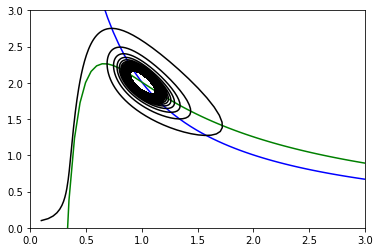

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint

a = 1.0
b = 1.0 + a*(1 + 0.01)

plt.figure(0)

u = np.linspace(0.1, 5, 100)
v1 = b/(a*u);
v2 = ((1 + b)*u - 1)/(a*u**2)
plt.plot(u,v1,'b-');
plt.plot(u,v2,'g-');

def du_dt(u, t):
    return [1 - (b + 1)*u[0] + a*u[0]**2*u[1], b*u[0] - a*u[0]**2*u[1]]

ts = np.linspace(0, 10000, 100000)
u0 = [0.1, 0.1]
us = odeint(du_dt, u0, ts)
pop1 = us[:,0]
pop2 = us[:,1]
plt.plot(pop1,pop2,'k-');
plt.xlim(0, 3)
plt.ylim(0,3);
